In [15]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from ruamel import yaml
import os
from load_cppimg import load_img
from MOLLI_fit import *
%matplotlib inline

[41115.18163071  3250.25304817 24860.71632824 35779.41128587
 41318.57988047 34764.3701684   6336.42940291 26416.55206831]


0it [00:00, ?it/s]/home/bughht/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
3it [00:00, 25.69it/s]/home/bughht/ShanghaiTech/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:26: RuntimeWarning: overflow encountered in exp
  return A-B*np.exp(-t/T1)
306it [00:14, 22.78it/s]/home/bughht/ShanghaiTech/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:26: RuntimeWarning: overflow encountered in multiply
  return A-B*np.exp(-t/T1)
4096it [03:06, 21.92it/s]


[[0.72483022 0.70325435 0.70085646 ... 0.71876794 0.70699319 0.7451823 ]
 [0.70345213 0.73582521 0.68913948 ... 0.68632299 0.77193753 0.69839058]
 [0.72069003 0.70965204 0.71246726 ... 0.72628611 0.71927714 0.71983309]
 ...
 [0.72727212 0.69754573 0.73012299 ... 0.66969767 0.77566573 0.69342392]
 [0.71893533 0.71430937 0.71712453 ... 0.69739911 0.70991504 0.70690457]
 [0.54341081 0.86643429 0.99007104 ... 0.43117939 0.74719244 0.69824129]]


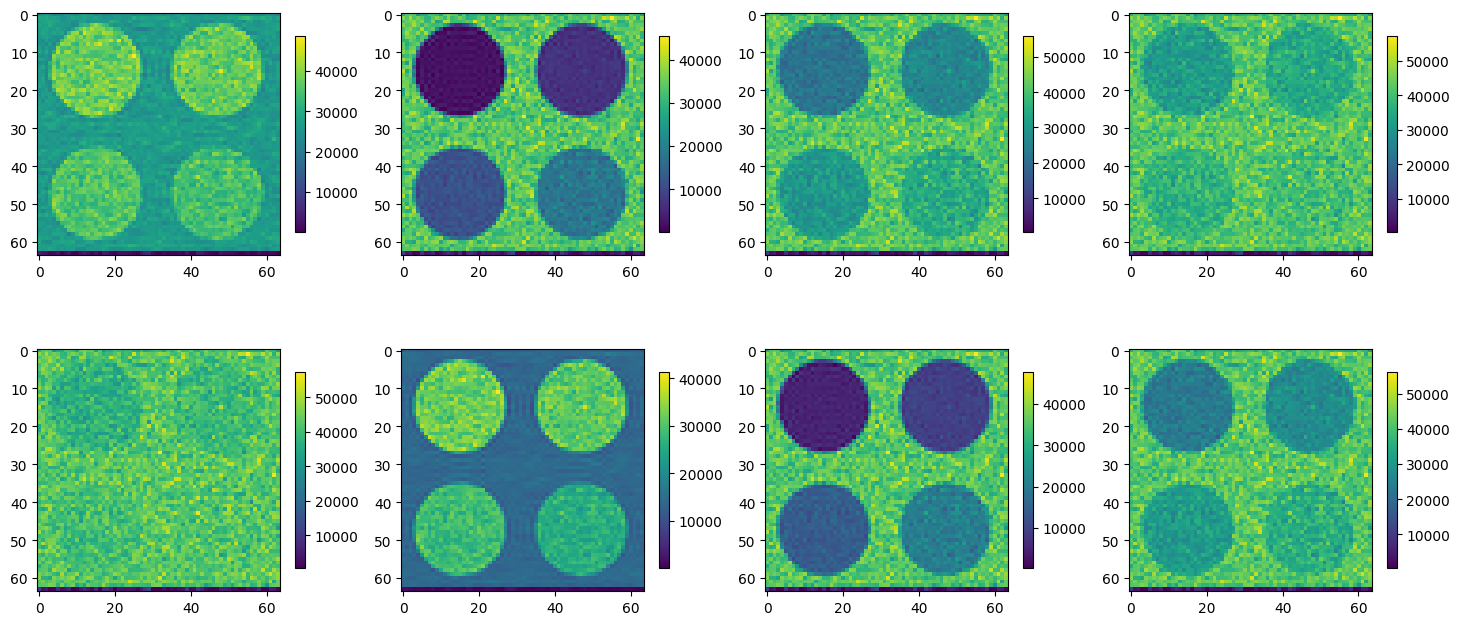

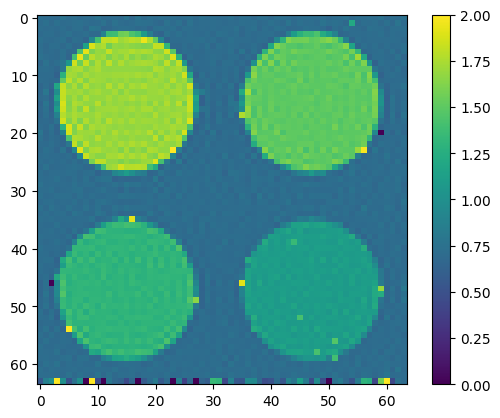

In [16]:
MOLLI_readout_img=[]
MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
for i in range(8):
    MOLLI_readout_img.append(load_img(
        "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA10_FOV320_K64_center_first", i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

# print(MOLLI_readout_img[:, 15, 15])

plt.figure(figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(MOLLI_readout_img[i])
    plt.colorbar(shrink=0.7)

T1_result = np.zeros(MOLLI_readout_img[0].shape)

for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
    # T1_star, T1, A, B = MAGIR(
    T1_star, T1, A, B = MF_MAGIR(
        MOLLI_readout_t, MOLLI_readout_img[:, x, y])
    T1_result[x, y] = T1

print(T1_result)

plt.figure()
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0,2)